In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
import warnings
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv(".\CareerMapping1.csv")

In [3]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [4]:
y = data.pop("Role")

In [5]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)


In [6]:
original_labels = label_encoder.classes_
label_mapping = {i: label for i, label in enumerate(original_labels)}
print(label_mapping)

{0: 'AI ML Specialist', 1: 'API Specialist', 2: 'Application Support Engineer', 3: 'Business Analyst', 4: 'Customer Service Executive', 5: 'Cyber Security Specialist', 6: 'Database Administrator', 7: 'Graphics Designer', 8: 'Hardware Engineer', 9: 'Helpdesk Engineer', 10: 'Information Security Specialist', 11: 'Networking Engineer', 12: 'Project Manager', 13: 'Software Developer', 14: 'Software tester', 15: 'Technical Writer'}


In [7]:
y_train_encoded

array([ 6,  6,  6, ..., 13,  8,  9])

In [8]:
x_train,x_temp,y_train,y_temp=train_test_split(data,y_train_encoded,test_size=0.5)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.6)

In [9]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train, y_train)
y_train_pred = knn.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = knn.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.5891137748084103
0.48002619515389655


In [11]:
neighnour_number = [j for j in range(5,110,5)]
for i in neighnour_number:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_train_pred = knn.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_val_pred = knn.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f" Train accuracy and Val accuracy for nearest neighbour {i} is {train_accuracy} and {val_accuracy}")

 Train accuracy and Val accuracy for nearest neighbour 5 is 0.7522106504224798 and 0.6326129666011788
 Train accuracy and Val accuracy for nearest neighbour 10 is 0.6594615838082138 and 0.5609037328094303
 Train accuracy and Val accuracy for nearest neighbour 15 is 0.6071919827078012 and 0.5284872298624754
 Train accuracy and Val accuracy for nearest neighbour 20 is 0.5741796030654353 and 0.4950884086444008
 Train accuracy and Val accuracy for nearest neighbour 25 is 0.5433287482806052 and 0.48330058939096265
 Train accuracy and Val accuracy for nearest neighbour 30 is 0.5120848889762232 and 0.4675834970530452
 Train accuracy and Val accuracy for nearest neighbour 35 is 0.48811161328355274 and 0.449901768172888
 Train accuracy and Val accuracy for nearest neighbour 40 is 0.46964040086460995 and 0.4307465618860511
 Train accuracy and Val accuracy for nearest neighbour 45 is 0.4588327765769306 and 0.4268172888015717
 Train accuracy and Val accuracy for nearest neighbour 50 is 0.467478876

In [12]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_train_pred = knn.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = knn.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.6594615838082138
0.5533726260641781


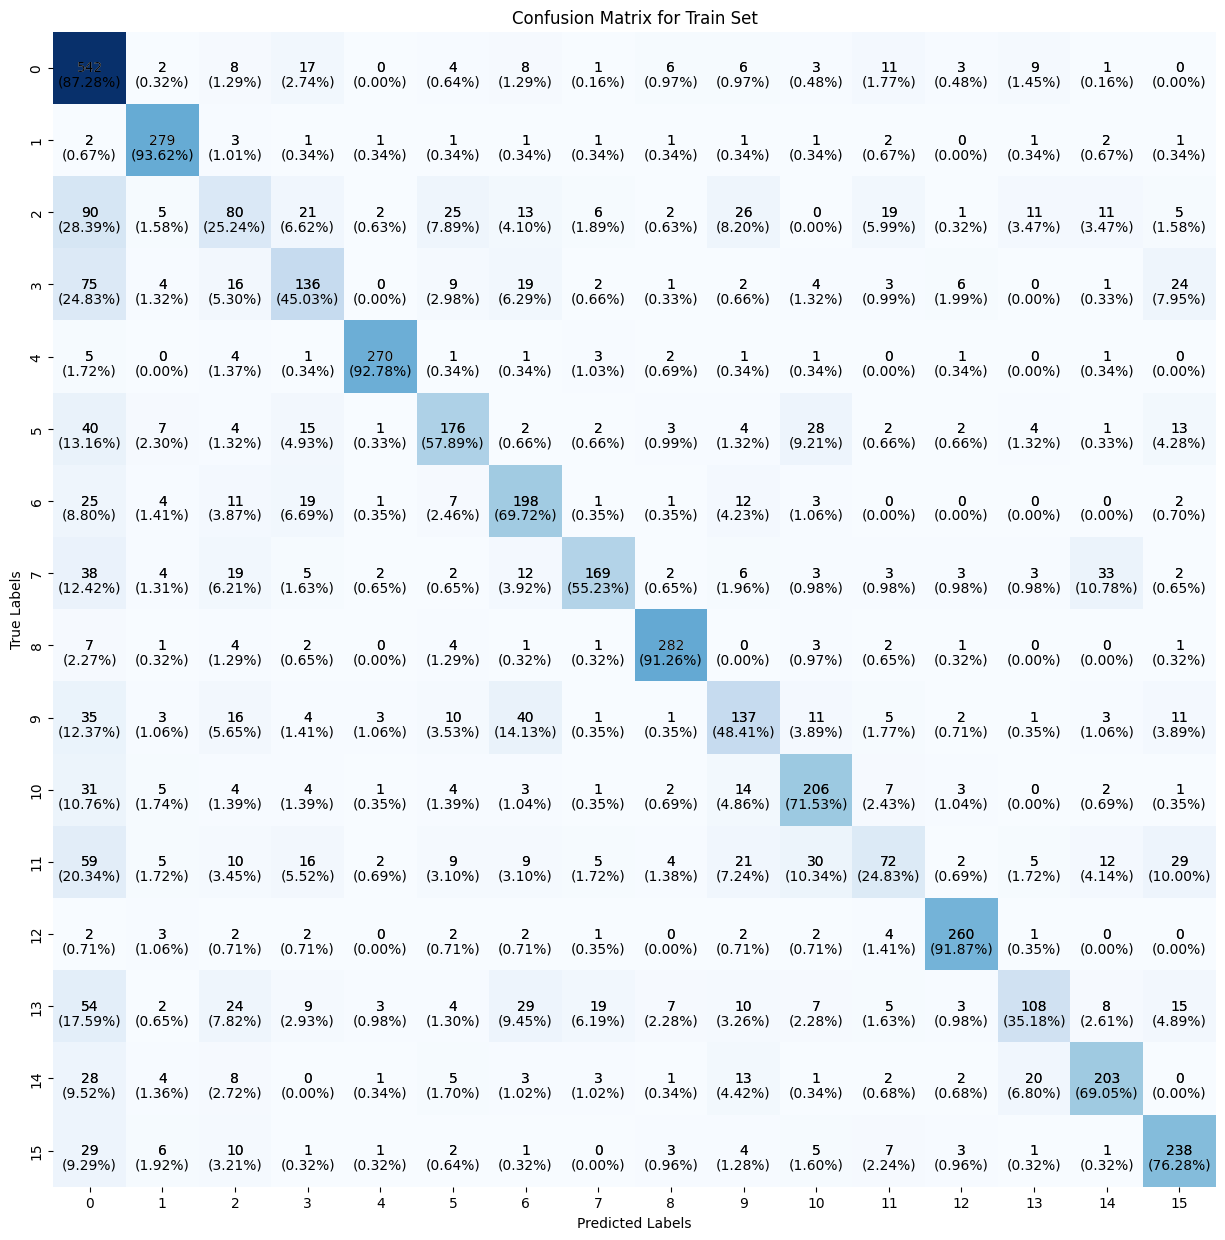

In [13]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Train Set')
plt.show()

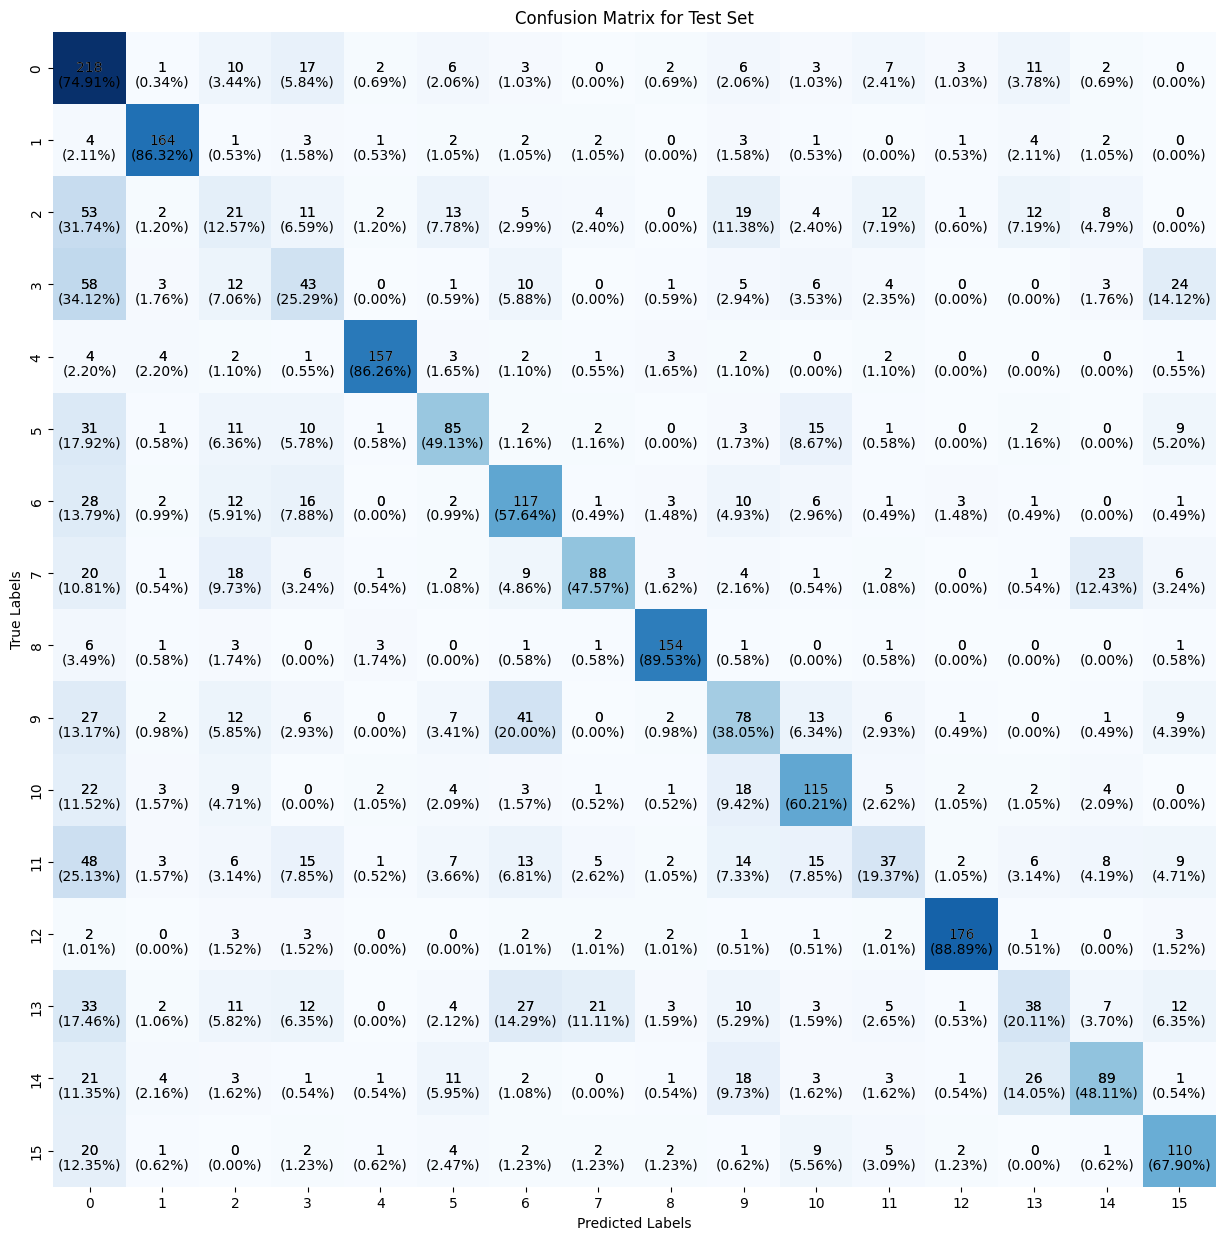

In [14]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()